In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv('/content/housing.csv',names=column_names,delimiter=r"\s+")
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# 데이터 전처리 X

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2022)
X_train.shape, y_train.shape

((404, 13), (404,))

In [ ]:
## 모델 만들기

from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, input_shape = (13,), activation = 'relu'),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(1)                      
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 200

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae', 'mse'])

In [ ]:
history = model.fit(X_train, y_train, epochs = EPOCHS, validation_split = 0.2)

Epoch 1/200
11/11 [==============================] - 2s 36ms/step - loss: 3884.9214 - mae: 57.6692 - mse: 3884.9214 - val_loss: 1151.4694 - val_mae: 31.4901 - val_mse: 1151.4694
Epoch 2/200
11/11 [==============================] - 0s 8ms/step - loss: 567.2672 - mae: 18.8311 - mse: 567.2672 - val_loss: 176.4689 - val_mae: 10.5863 - val_mse: 176.4689
Epoch 3/200
11/11 [==============================] - 0s 8ms/step - loss: 455.5184 - mae: 15.9444 - mse: 455.5184 - val_loss: 239.4048 - val_mae: 12.9768 - val_mse: 239.4048
Epoch 4/200
11/11 [==============================] - 0s 9ms/step - loss: 266.6786 - mae: 12.0493 - mse: 266.6786 - val_loss: 156.1364 - val_mae: 9.2342 - val_mse: 156.1364
Epoch 5/200
11/11 [==============================] - 0s 11ms/step - loss: 189.4957 - mae: 10.5637 - mse: 189.4957 - val_loss: 163.4497 - val_mae: 9.3683 - val_mse: 163.4497
Epoch 6/200
11/11 [==============================] - 0s 10ms/step - loss: 170.1118 - mae: 9.9242 - mse: 170.1118 - val_loss: 139.42

In [ ]:
## 결과 시각화

def plot_history(history):
  hist = history.history
  plt.figure(figsize = (20, 12))
  plt.subplot(1, 2, 1)
  plt.plot(history.epoch, hist['loss'], label = 'loss')
  plt.plot(history.epoch, hist['val_loss'], label = 'val_loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(history.epoch, hist['mae'], label = 'mae')
  plt.plot(history.epoch, hist['val_mae'], label = 'val_mae')
  plt.legend()
  plt.show()

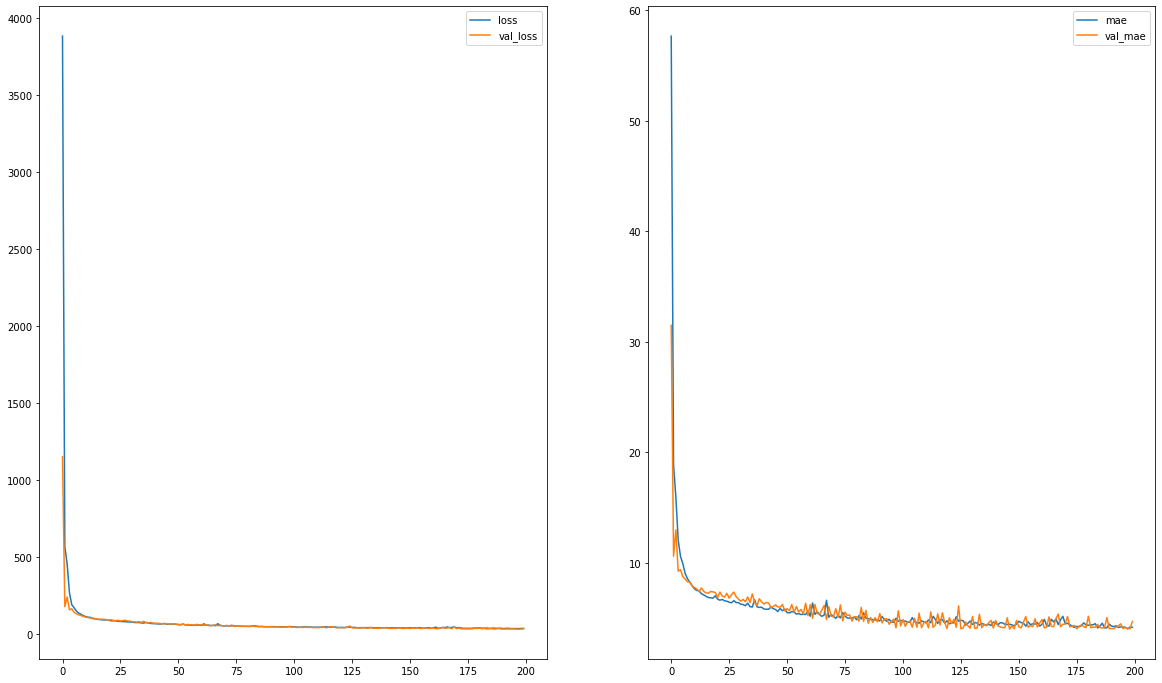

In [ ]:
plot_history(history)

In [ ]:
df.duplicated

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# unit, layers 추가한 모델 만들기

model = keras.Sequential([
    layers.Dense(32, input_shape = (13,), activation = 'relu'),
    layers.Dropout(rate = 0.2, input_shape = (13,)),
    layers.Dense(16, activation = 'relu'),
    layers.Dropout(rate = 0.2),
    layers.Dense(8, activation = 'relu'),
     layers.Dropout(rate = 0.2),
    layers.Dense(1)                      
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                448       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [ ]:
EPOCHS = 200

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae', 'mse'])

In [ ]:
history = model.fit(X_train, y_train, epochs = EPOCHS, validation_split = 0.2)

Epoch 1/200
11/11 [==============================] - 1s 33ms/step - loss: 1771.0927 - mae: 33.5788 - mse: 1771.0927 - val_loss: 112.1144 - val_mae: 9.1152 - val_mse: 112.1144
Epoch 2/200
11/11 [==============================] - 0s 11ms/step - loss: 1271.1792 - mae: 27.1163 - mse: 1271.1792 - val_loss: 101.7751 - val_mae: 6.6743 - val_mse: 101.7751
Epoch 3/200
11/11 [==============================] - 0s 9ms/step - loss: 798.5332 - mae: 22.3311 - mse: 798.5332 - val_loss: 113.9778 - val_mae: 7.3446 - val_mse: 113.9778
Epoch 4/200
11/11 [==============================] - 0s 10ms/step - loss: 572.6422 - mae: 19.5473 - mse: 572.6422 - val_loss: 127.6664 - val_mae: 8.0401 - val_mse: 127.6664
Epoch 5/200
11/11 [==============================] - 0s 9ms/step - loss: 559.7072 - mae: 19.0473 - mse: 559.7072 - val_loss: 143.6585 - val_mae: 8.9032 - val_mse: 143.6585
Epoch 6/200
11/11 [==============================] - 0s 10ms/step - loss: 488.1606 - mae: 18.1301 - mse: 488.1606 - val_loss: 140.237

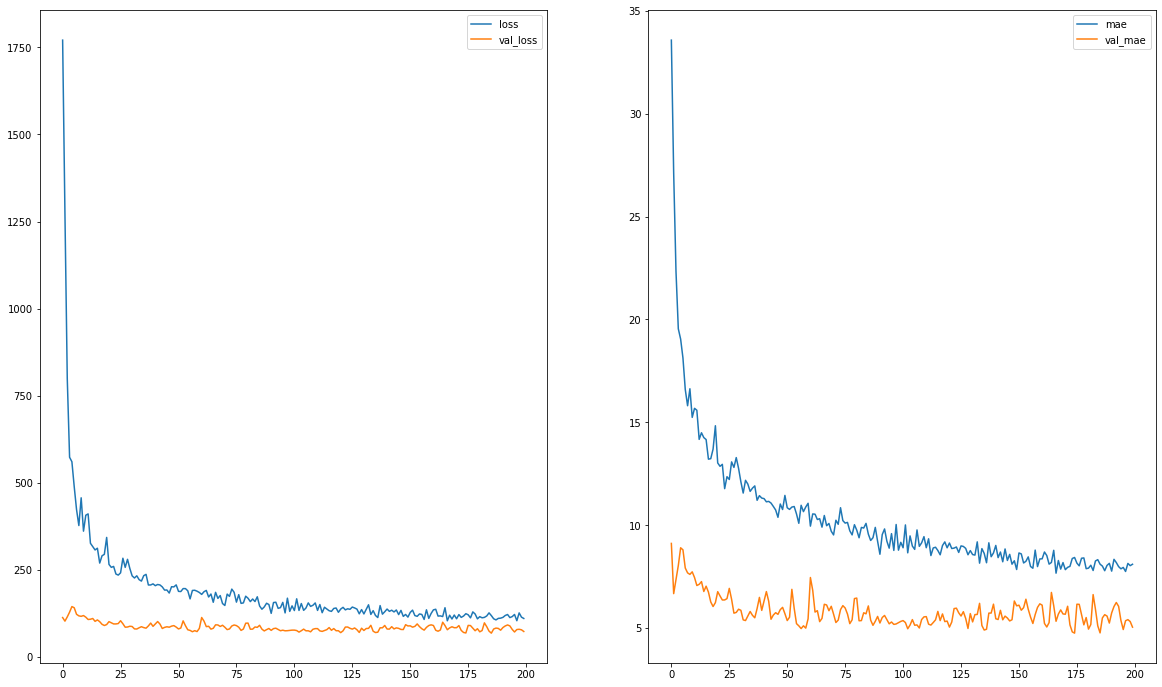

In [ ]:
plot_history(history)